In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [26]:
df.shape

(32581, 12)

In [27]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [6]:
df.isnull().any()

,0
person_age,False
person_income,False
person_home_ownership,False
person_emp_length,True
loan_intent,False
loan_grade,False
loan_amnt,False
loan_int_rate,True
loan_status,False
loan_percent_income,False


In [7]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [13]:
Q1 = df["loan_amnt"].quantile(0.25)


In [14]:
Q3=df["loan_amnt"].quantile(0.75)

0         True
1        False
2        False
3         True
4         True
         ...  
32576    False
32577    False
32578     True
32579    False
32580    False
Name: loan_amnt, Length: 32581, dtype: bool


<Axes: ylabel='loan_amnt'>

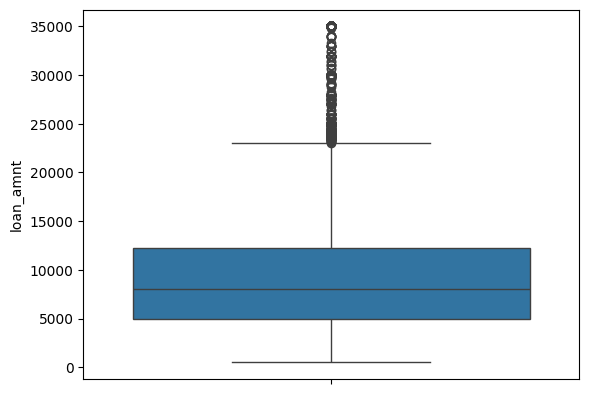

In [18]:
IQR = Q3 - Q1

# Define outliers
outliers = (df["loan_amnt"] < (Q1 - 1.5 * IQR)) | (df["loan_amnt"] > (Q3 + 1.5 * IQR))
print(outliers)
sns.boxplot(df["loan_amnt"])

In [20]:
df["k"]=df["person_income"]/df["loan_amnt"]
df["k"]

,k
0,1.685714
1,9.600000
2,1.745455
3,1.871429
4,1.554286
...,...
32576,9.137931
32577,6.808511
32578,2.171429
32579,10.000000


<Axes: xlabel='loan_amnt', ylabel='loan_grade'>

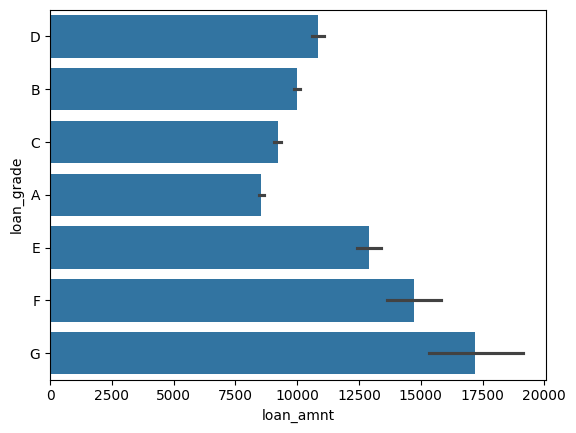

In [43]:
sns.barplot(x="loan_amnt",y="loan_grade",data=df)

<Axes: xlabel='person_income', ylabel='loan_grade'>

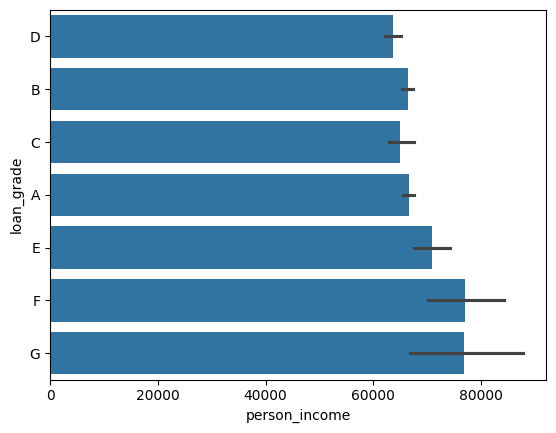

In [44]:
sns.barplot(x="person_income",y="loan_grade",data=df)

<Axes: xlabel='person_income', ylabel='loan_amnt'>

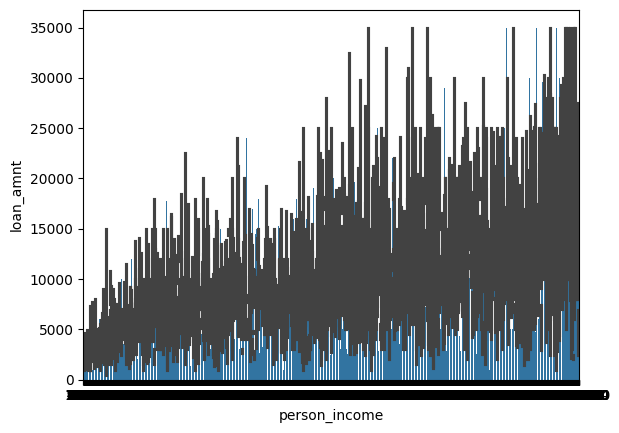

In [45]:
sns.barplot(x="person_income",y="loan_amnt",data=df)